In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
class PointCharge:
    """Creates a point charge of charge q at a point (x,y) from the origin."""
    
    # Initializer - add charge and x- and y-coordinates to the point charge
    def __init__(self,charge,x,y):
        self.charge = charge
        self.x = x
        self.y = y

In [4]:
from math import sqrt

def V(q,x,y):
    "This function calculates the potential at the point (x,y) due to a point charge q."
    
    k = 9e9
    Q = q.charge
    r = sqrt( (q.x-x)**2 + (q.y-y)**2 )
    
    try:
        V = k*Q/r
    except ZeroDivisionError:
        print("Error: r = 0, so V is undefined at this point.")
        return
    
    return V

def F(q1,q2):
    """This function calculates the magnitude of the force between two point charges of charge q1 and q1."""
    
    k = 9e9
    
    Q1,Q2 = q1.charge, q2.charge
    r = sqrt((q1.x - q2.x)**2 + (q1.y - q1.x)**2)
    F = k*Q1*Q2/r**2
    
    return F

# Example 1

There are three point charges in a triangle configuration. Their charges and locations are given here:

$q_1 = 4.2 \textrm{ nC and } (x_1, y_1) = (0 \textrm{ cm, } 2 \textrm{ cm})$

$q_2 = -3.6 \textrm{ nC and } (x_1, y_1) = (2 \textrm{ cm, } -3 \textrm{ cm})$

$q_3 = 7.5 \textrm{ mC and } (x_1, y_1) = (-2 \textrm{ cm, } -3 \textrm{ cm})$

A.) Create three objects in Python ($q_1$, $q_2$, and $q_3$) with the corresponding coordinates and charges. Put them into a single list: $Q$ = [ $q_1$,  $q_2$ , $q_3$ ]

B.) Plot these point charges as points on a scatter plot using matplotlib, to see where they are in space.

C.) Calculate the total potential at the origin due to each of the charges.

# Solution

### A.) First Method: Create three separate point charges, and put them together in a list. Here, we define the point charges individually by calling them $q_1$, $q_2$, and $q_3$. Then we put them in a list like this:
### $Q$ = [ $q_1$,  $q_2$ , $q_3$ ]
### so that we can loop over each element later on.

In [10]:
# The format for creating a point charge:
# q = PointCharge(charge, x-coordinate, y-coordinate)
# Do this for each charge

q1 = PointCharge(4.2e-9, 0, 0.02)
q2 = PointCharge(-3.6e-9, 0.02, -0.03)
q3 = PointCharge(7.5e-3, -0.02, -0.03)

Q = [q1,q2,q3]

### A.) Second Method: Create a list for the charges, x-coordinates, and y-coordinates. Loop over each list, create a point charge, and append this point charge to an empty list called $Q$.

In [11]:
# Create lists for xcoord, ycoord, and charges.
charges = [4.2e-9, -3.6e-9, 7.5e-3]
xcoord = [0, 0.02, -0.02]
ycoord = [0.02, -0.03, -0.03]

# Create an empty list called 'Q'. We'll add to this later on.
Q = []

# Loop over the xcoord, ycoord, and charges lists simultaneously using the 'zip' function,
# create point charges, and append them to the empty list called 'Q'.
for q,x,y in zip(charges, xcoord, ycoord):
    Q.append(PointCharge(q,x,y))

### A.) Third Method: Create the three lists like in the Second Method, but use a list comprehension to create the charge list Q instead of a for loop. 

In [12]:
# Create lists for xcoord, ycoord, and charges.
charges = [4.2e-9, -3.6e-9, 7.5e-3]
xcoord = [0, 0.02, -0.02]
ycoord = [0.02, -0.03, -0.03]

Q = [ PointCharge(q,x,y) for q,x,y in zip(charges, xcoord, ycoord)]

### B.) We have the x,y coordinates in the two lists xcoord and ycoord. We can use the plt.scatter function to plot these as point charges on xy-axes.

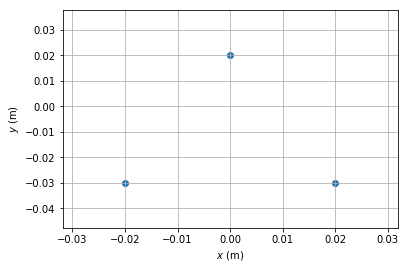

In [14]:
import matplotlib.pyplot as plt

plt.scatter(xcoord,ycoord)
plt.xlabel("$x$ (m)")
plt.ylabel("$y$ (m)")
plt.grid()
plt.show()

### C.) To do this, we first initialize the variable $V_o$ (the electric potential at the origin). Then we loop over each charge and add its contribution to $V_o$.

In [15]:
# Define V_o to be zero, as a floating point value
V_o = 0.0

# Loop over each charge.
for q in Q:                   # For each charge in Q,
    V_o += V(q,0,0)           # Add its electric potential to that at the origin.
    
V_o

1872114153.6458306

# Example 2

There is a point charge at the origin with a charge $q_1 = 5.3 \textrm{ mC}$. We are going to visualize the electric potential that it creates at all points in space near the charge.

A.) The first step is to set up the xy-axes that we'll be using. Let's create our axes as a square with side of length 2, centered around the origin. We can do this by defining the four sides of our square:

$x_1 = -1$       
$x_2 = 1$     
$y_1 = -1$     
$y_2 = 1$     

In [ ]:
# Define each point manually. Units of distance are meters
x1 = -1
x2 = 1
y1 = -1
y2 = 1

B.) We also have to discretize our axes, meaning our xy-axes will really be an $N \times N$ array of boxes, and we fill each box with the value of the electric potential at that point. Call it $V_{space}$, which is the electric potential at all points in space within our grid. We can define a value of $N$ and create an empty array that we'll fill in later. Creating an empty array before starting the problem allocates a certain amount of memory for it in the computer, which is always faster than creating arrays as we go.

Ultimately, we have three immediate tasks:

* Define a value of $N$ (for example, let's say $N = 10$). I encourage you to change this later and see how it affects the results!


* Create an empty grid (array of boxes) of size $ N \times N$, which we can do easily using the `np.zeros` function. The syntax is as follows:

    * `V_space = np.zeros([nrows,ncols], datatype)` where `nrows` is the number of rows, `ncols` is the number of columns, and `datatype` is the type of data in the array. In our case, use $N$ for both the number of rows and columns, and the data type we'll use is the `float`.
    
    
* We'll also place a point charge at the origin $(0,0)$ with charge $5.3 \times 10^{-6} \textrm{ C}$, and call it $q$.

In [ ]:
# Define the size of our box
N = 10

# Create an emtpy array for our electric potential, and call it V_space
V_space = np.zeros([N,N], float)

# Create a point charge at the origin
q = Pointcharge(5.3e-6, 0, 0)

C.) Now we start thinking about a way for us to loop through each $(x,y)$ coordinate. One way to do this is to use the NumPy linspace command to create a set of $x$ and $y$ values for us to loop through. Create a Python variable called $x$ which is a set of $N$ coordinates that is evenly spaced from $x_1$ to $x_2$. Do the same for $y$.

In [ ]:
x = np.linspace(x1,x2,N)
y = np.linspace(y1,y2,N)

D.) This is the part where we calculate the potential. We have an array of zeros called $V_{space}$, and as we loop through each $x$ and $y$ coordinate, we will calculate the electric potential $V(x,y)$ and insert it into the $V_{space}$ array.

To loop through the $x$ and $y$ coordinates, use these for loops:

In [ ]:
for i in range(len(x)):
    for j in range(len(y)):

We now have $i$ and $j$, which refer to $i^{th}$ value along the $x$-axis and the $j^{th}$ value along the $y$-axis.



the $i^{th}$ row and $j^{th}$ 

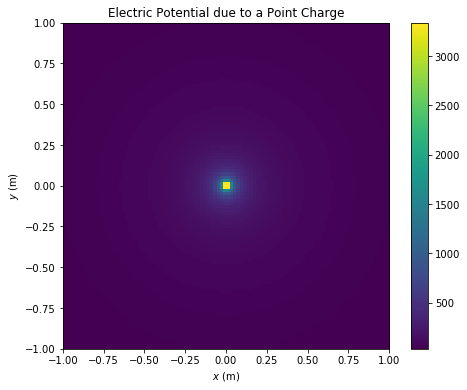

In [18]:
N = 100

x1 = -1
x2 = 1

y1 = -1
y2 = 1


V_space = np.zeros([N,N], float)


q = PointCharge(5.3e-9,0,0)


x = np.linspace(x1,x2,N)
y = np.linspace(y1,y2,N)


for i in range(len(x)):
    for j in range(len(y)):
        
        if x[i] == q.x and y[j] == q.y:
            V_space[i,j] = np.max(V_space)
            continue
        
        V_space[i,j] = V(q,x[i],y[j])


plt.figure(figsize=(8,6))
plt.imshow(V_space, origin='lower', cmap = 'viridis', extent=(x1,x2,y1,y2))
plt.title("Electric Potential due to a Point Charge")
plt.xlabel("$x$ (m)")
plt.ylabel("$y$ (m)")
plt.colorbar()
plt.show()